# TP2

In [1]:
import Utils as ut
from Models import Cluster
from Preprocesses import Preprocesses

Lecture fichier

In [2]:
df_hiseq = ut.read_csv()
df_ecg = ut.read_ecg()

## Données ecg
La segmentation des données sans ACP en utilisant les techniques de KMeans, DBSCAN et spectral Cluster avec leur affichage.

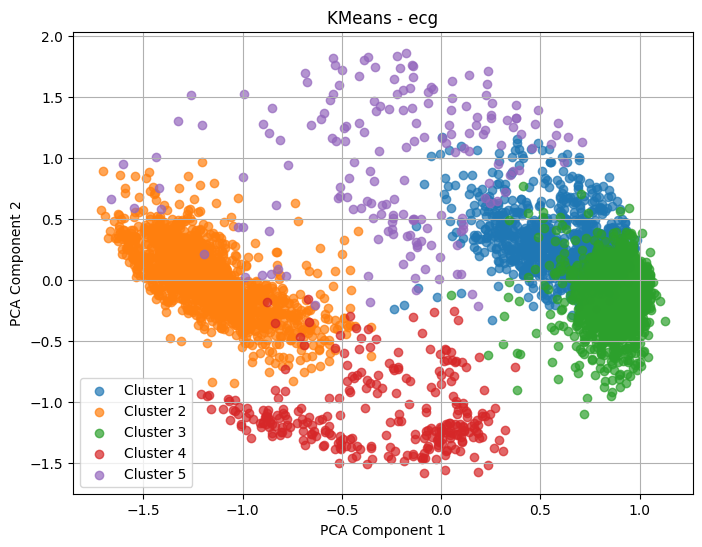

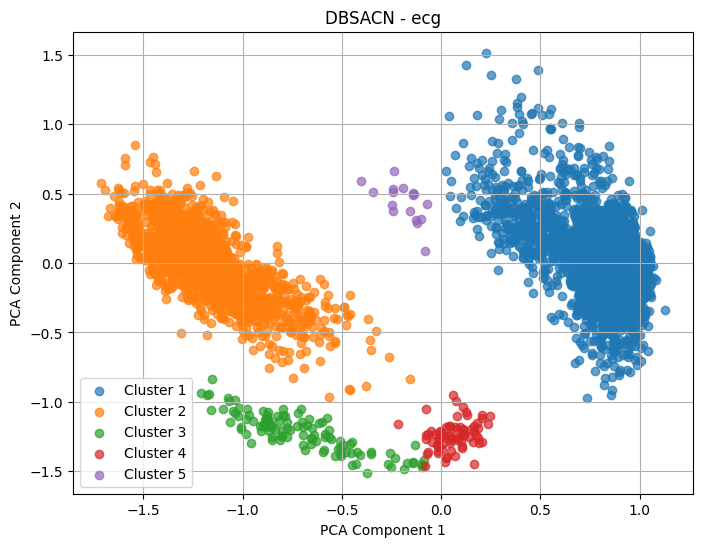

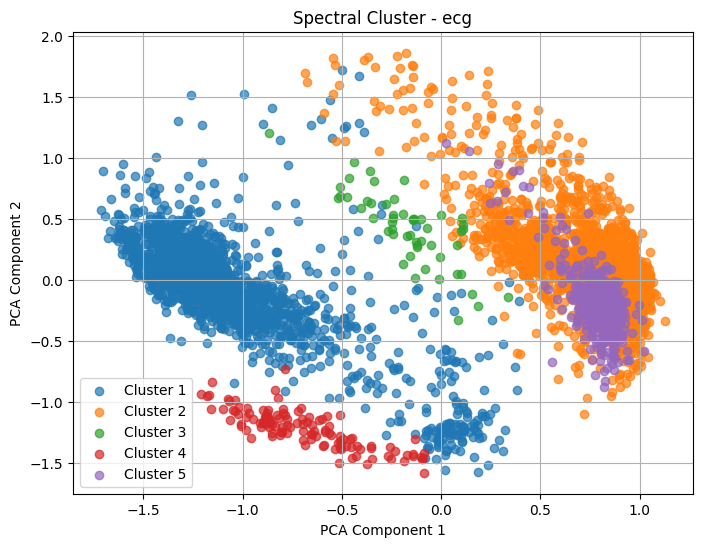

In [3]:
cluster_ecg = Cluster(df_ecg)


label_kmeans_ecg = cluster_ecg.Kmeans()
label_dbscan_ecg = cluster_ecg.dbscan()
label_sc_ecg = cluster_ecg.SpectralCluster()

cluster = [("KMeans - ecg",label_kmeans_ecg),("DBSACN - ecg",label_dbscan_ecg),("Spectral Cluster - ecg",label_sc_ecg)]

for name,label in cluster:
    ut.plot_clusters(df_ecg,label, name)

### Évaluation des algoritmes de segmentations

In [4]:
cluster = [("KMeans",label_kmeans_ecg),("DBSACN",label_dbscan_ecg),("Spectral Cluster",label_sc_ecg)]

for name,label in cluster:
    ut.evaluate_cluster_interne(df_ecg,label, name)

Méthode: KMeans
Silhouette Score:  0.30801632380855437
Davies-Bouldin Index:  1.411335008281107
Indice de Calinski-Harabasz:  2497.697759300504

Méthode: DBSACN
Silhouette Score:  0.42765859832267905
Davies-Bouldin Index:  1.4727034696227659
Indice de Calinski-Harabasz:  940.3915442900268

Méthode: Spectral Cluster
Silhouette Score:  0.307228966007482
Davies-Bouldin Index:  1.0430773169045526
Indice de Calinski-Harabasz:  1792.2256429719569



## Avec ACP

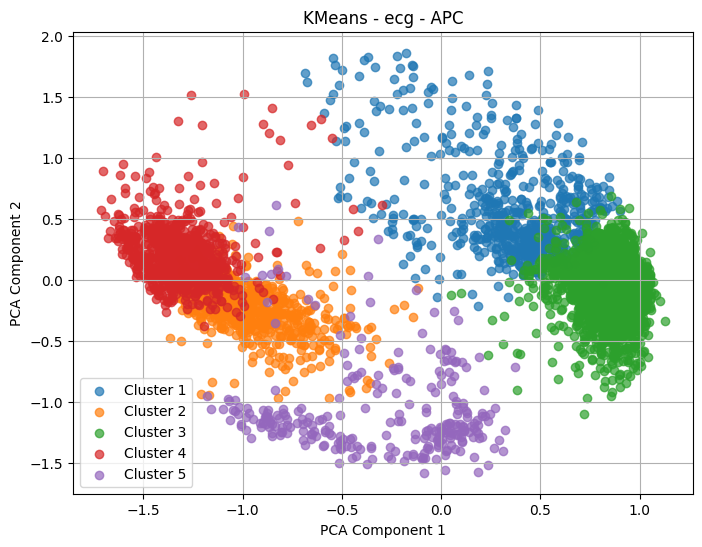

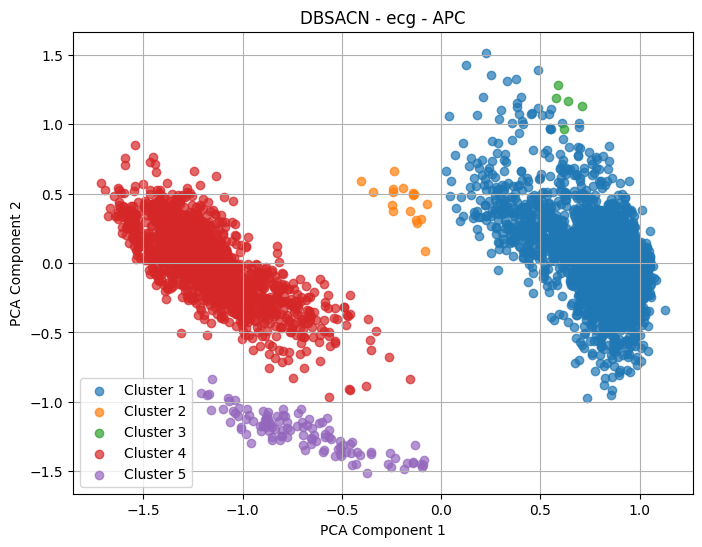

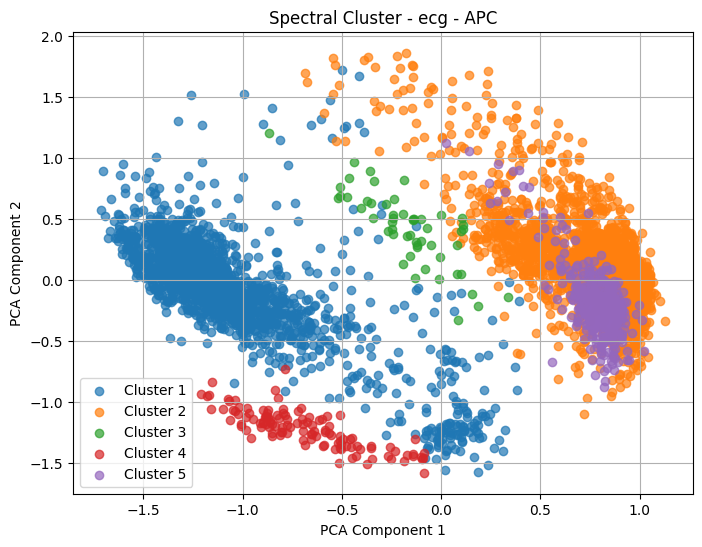

In [5]:
clean = Preprocesses(df_ecg)
df_ecg =clean.pca()
cluster_ecg_apc = Cluster(df_ecg)


label_kmeans_ecg_apc = cluster_ecg_apc.Kmeans()
label_dbscan_ecg_apc = cluster_ecg_apc.dbscan()
label_sc_ecg_apc = cluster_ecg_apc.SpectralCluster()

cluster = [("KMeans - ecg - APC",label_kmeans_ecg_apc),("DBSACN - ecg - APC",label_dbscan_ecg_apc),("Spectral Cluster - ecg - APC",label_sc_ecg_apc)]

for name,label in cluster:
    ut.plot_clusters(df_ecg,label, name)

### Évaluation des algoritmes de segmentations

In [6]:
cluster = [("KMeans",label_kmeans_ecg_apc),("DBSACN",label_dbscan_ecg_apc),("Spectral Cluster",label_sc_ecg_apc)]

for name,label in cluster:
    ut.evaluate_cluster_interne(df_ecg,label, name)

Méthode: KMeans
Silhouette Score:  0.2717427020561455
Davies-Bouldin Index:  1.6146161742490175
Indice de Calinski-Harabasz:  2379.857216353886

Méthode: DBSACN
Silhouette Score:  0.3698524496076229
Davies-Bouldin Index:  1.470448340050106
Indice de Calinski-Harabasz:  843.5386742577418

Méthode: Spectral Cluster
Silhouette Score:  0.308230132619774
Davies-Bouldin Index:  1.0387893923454323
Indice de Calinski-Harabasz:  1797.8477739938983



## Données hiseq
La segmentation des données sans ACP en utilisant les techniques de KMeans, DBSCAN et spectral Cluster avec leur affichage

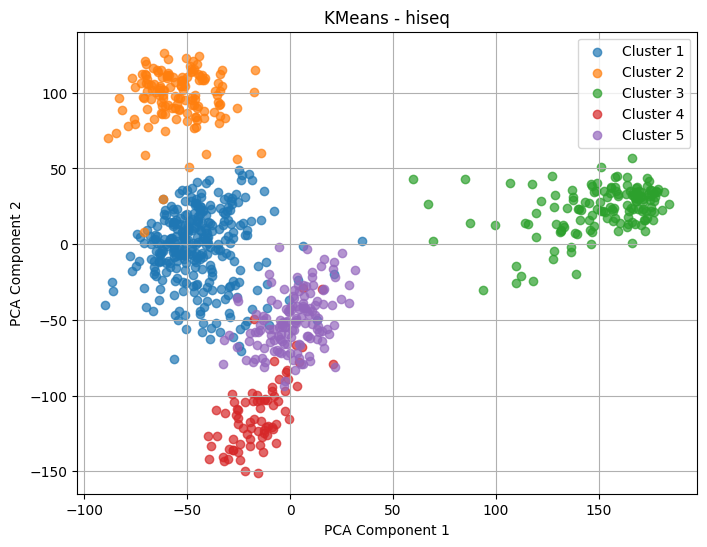

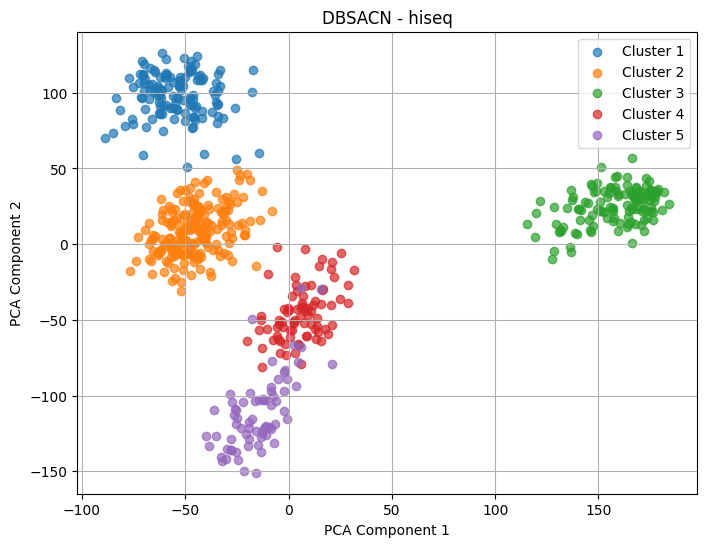

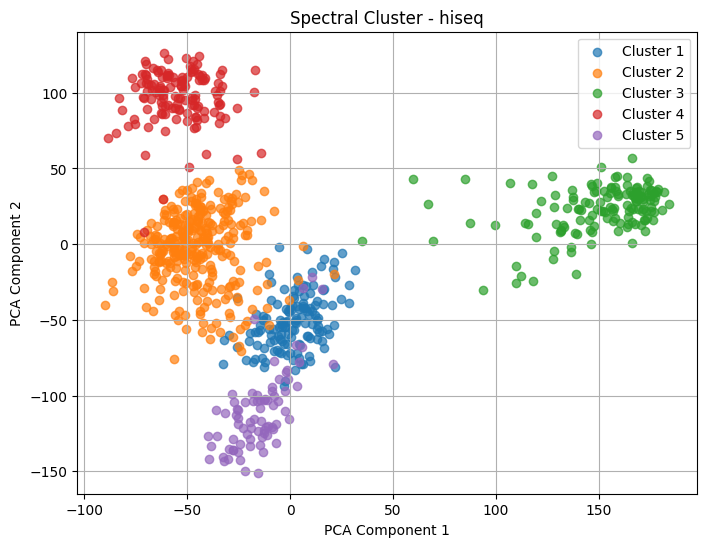

In [7]:
clean = Preprocesses(df_hiseq)
df_hiseq =clean.drop('Class')

cluster_hiseq = Cluster(df_hiseq)

label_kmeans_hiseq = cluster_hiseq.Kmeans()
label_dbscan_hiseq = cluster_hiseq.dbscan(175)
label_sc_hiseq = cluster_hiseq.SpectralCluster()

cluster = [("KMeans - hiseq",label_kmeans_hiseq),("DBSACN - hiseq",label_dbscan_hiseq),("Spectral Cluster - hiseq",label_sc_hiseq)]

for name,label in cluster:
    ut.plot_clusters(df_hiseq,label, name)


### Évaluation des algoritmes de segmentations

In [9]:
cluster = [("KMeans",label_kmeans_hiseq),("DBSACN",label_dbscan_hiseq),("Spectral Cluster",label_sc_hiseq)]

for name,label in cluster:
    ut.evaluate_cluster_interne(df_hiseq,label, name)

Méthode: KMeans
Silhouette Score:  0.22488527683456977
Davies-Bouldin Index:  1.8312963835948153
Indice de Calinski-Harabasz:  124.90109519428106

Méthode: DBSACN
Silhouette Score:  0.15175359459804
Davies-Bouldin Index:  2.6383960867534846
Indice de Calinski-Harabasz:  76.75117604152015

Méthode: Spectral Cluster
Silhouette Score:  0.22441563217214042
Davies-Bouldin Index:  1.8308319539842466
Indice de Calinski-Harabasz:  124.59130172918402



## Avec ACP

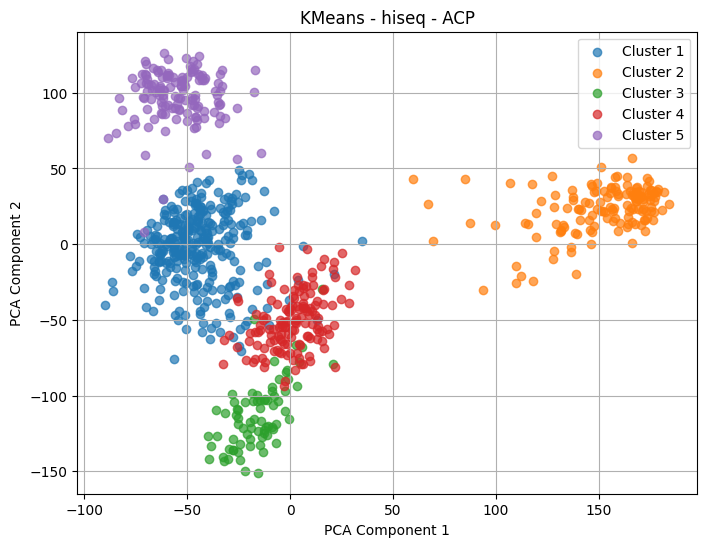

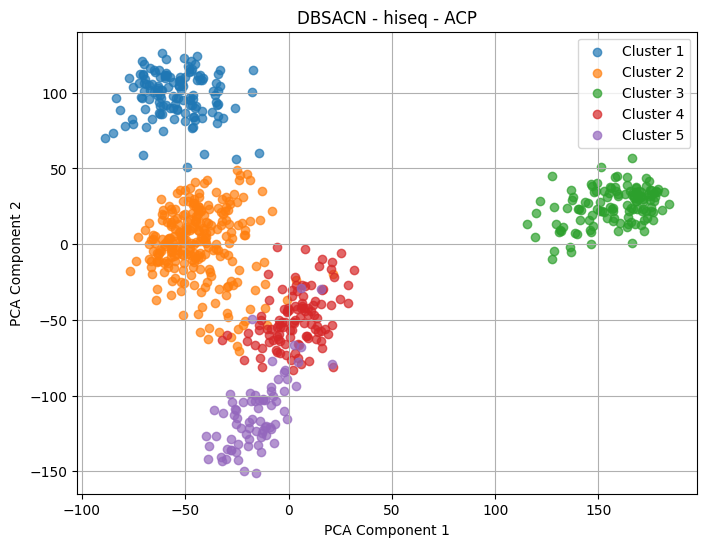

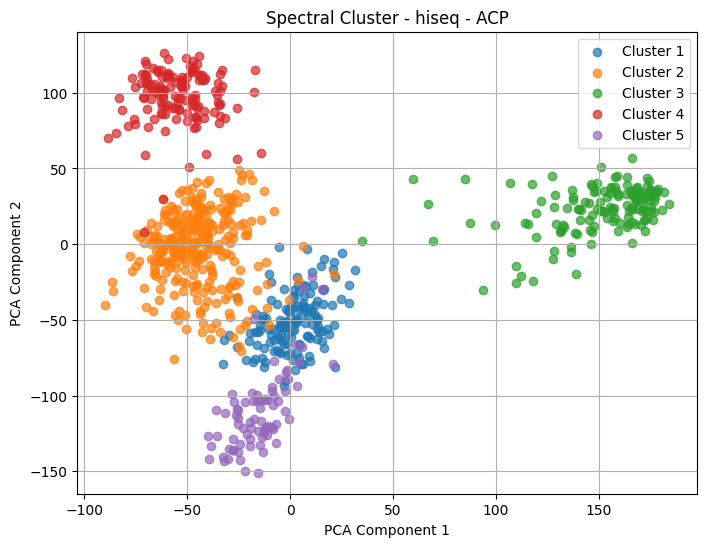

In [10]:
df_hiseq = clean.pca()
cluster_hiseq_acp = Cluster(df_hiseq)

label_kmeans_hiseq_acp = cluster_hiseq_acp.Kmeans()
label_dbscan_hiseq_acp = cluster_hiseq_acp.dbscan(125)
label_sc_hiseq_acp = cluster_hiseq_acp.SpectralCluster()

cluster = [("KMeans - hiseq - ACP",label_kmeans_hiseq_acp),("DBSACN - hiseq - ACP",label_dbscan_hiseq_acp),("Spectral Cluster - hiseq - ACP",label_sc_hiseq_acp)]

for name,label in cluster:
    ut.plot_clusters(df_hiseq,label, name)

### Évaluation des algoritmes de segmentations

In [11]:
cluster = [("KMeans",label_kmeans_hiseq_acp),("DBSACN",label_dbscan_hiseq_acp),("Spectral Cluster",label_sc_hiseq_acp)]

for name,label in cluster:
    ut.evaluate_cluster_interne(df_hiseq,label, name)

Méthode: KMeans
Silhouette Score:  0.3080263771521084
Davies-Bouldin Index:  1.434628944843058
Indice de Calinski-Harabasz:  198.5497907465549

Méthode: DBSACN
Silhouette Score:  0.2804646184398263
Davies-Bouldin Index:  2.412035115756473
Indice de Calinski-Harabasz:  151.16663574881764

Méthode: Spectral Cluster
Silhouette Score:  0.3076540460655385
Davies-Bouldin Index:  1.4318051628982331
Indice de Calinski-Harabasz:  197.9454120668344

